# Dataset: MBTI Personality Types 500 Dataset

Acerca del conjunto de datos: <br/>
MBTI (Indicador de tipo Myers-Briggs) es un cuestionario de autoevaluación introspectivo que indica las diferentes preferencias psicológicas (funciones cognitivas / personalidad) sobre cómo las personas perciben el mundo y toman decisiones.

[Dataset en Kaggle](https://www.kaggle.com/datasets/zeyadkhalid/mbti-personality-types-500-dataset)

# **TIPO DE PERSONALIDADES MBTI**

---

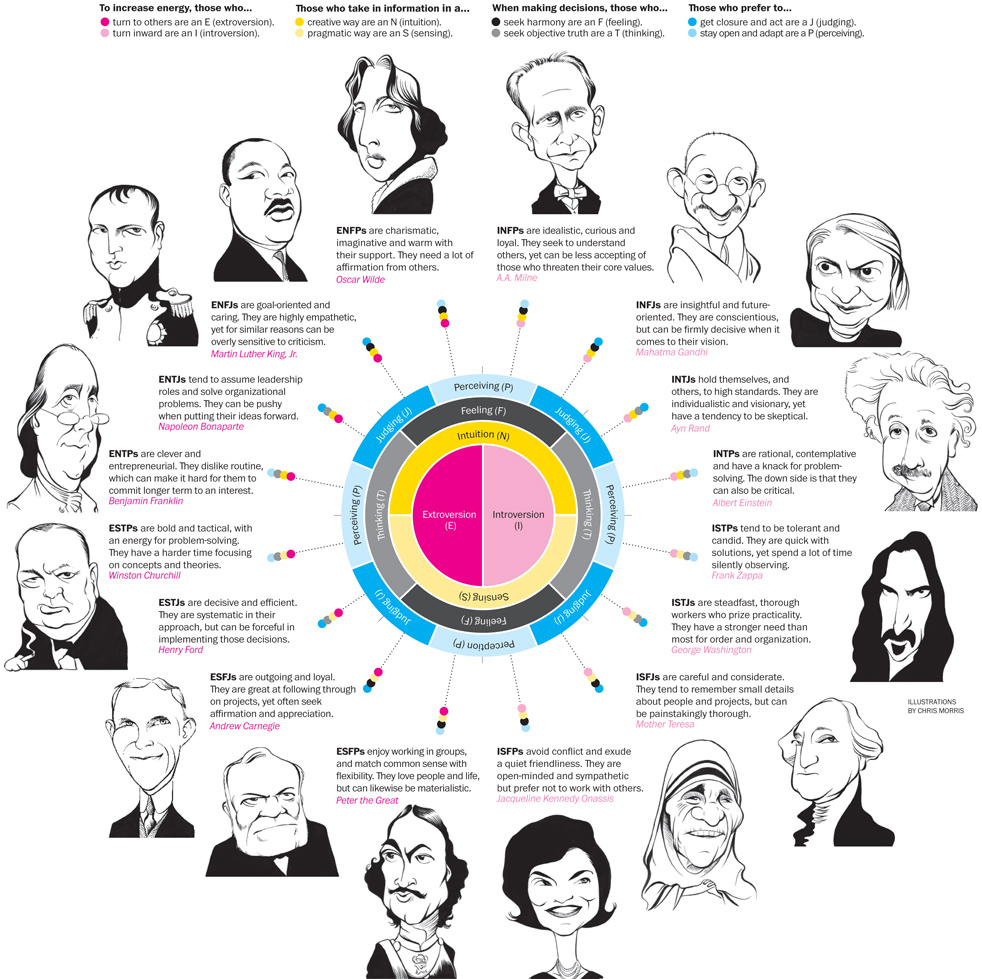


# Myers-Brigs Type Indicator - MBTI
MBTI identifica cuatro dicotomías separadas:
Extraversión vs Introversión, Sensación vs Intuición, Pensamiento vs Sentimiento, y Juicio vs Percepción. Se supone que un individuo tiene preferencia por una de cada par de opuestos sobre la otra.

<table align='center'>
<tr>
<th colspan=2> Extraversión - Introversión <br/> (actitudes u orientaciones de energía) </th>
</tr>

<tr>
<th> Extraversión (E) </th>
<th> Introversión (I) </th>
</tr>
<tr>
<td>
    Están orientados principalmente hacia el mundo exterior, tienden a enfocar su energía en las personas y los objetos.
</td>
<td>
    Están orientados principalmente hacia el mundo interior, tienden a enfocar su energía en conceptos, ideas y experiencias internas.  
</td>
</tr>

<tr>
<th colspan=2> Sensación - Intuición <br/> (funciones o procesos de percepción) </th>
</tr>
<tr>
<th> Sensación (S) </th>
<th> Intuición (N) </th>
</tr>
<tr>
<td>
    Están orientados principalmente hacia lo que se puede percibir por los cinco sentidos.
</td>
<td>
    Están enfocados principalmente en percibir patrones e interrelaciones.  
</td>
</tr>

<tr>
<th colspan=2> Sensación - Intuición <br/> (funciones o procesos de juicio) </th>
</tr>
<tr>
<th> Pensamiento (T) </th>
<th> Sentimiento (F) </th>
</tr>
<tr>
<td>
    Basando conclusiones en análisis lógicos con un enfoque en la objetividad y la distancia emocional.
</td>
<td>
    Basando conclusiones en valores personales o sociales con un enfoque en la comprensión y la armonía.  
</td>
</tr>

<tr>
<th colspan=2> Sensación - Intuición <br/> (actitudes u orientaciones hacia cómo se enfrenta el mundo exterior) </th>
</tr>
<tr>
<th> Juicio (J) </th>
<th> Percepción (P) </th>
</tr>
<tr>
<td>
    Prefiriendo la determinación y el cierre que resultan al lidiar con el mundo exterior utilizando uno de los procesos de Juicio.
</td>
<td>
    Prefiriendo la flexibilidad y espontaneidad que resulta al lidiar con el mundo exterior utilizando uno de los procesos de Percepción.  
</td>
</tr>
</table>


# Relación de las 16 personalidades MBTI entre las palabras, del dataset, usadas en el cuestionario
> Con este análisis, buscamos investigar si hay alguna relación entre las distintas personalidades y las palabras de las respuestas del cuestionario de personalidad.
> ¿Qué es lo que haremos? Realizaremos:

1. Preprocesamiento del dataset para seleccionar las palabras más importantes por cada tipo de personalidad.
2. Normalización de las frecuencias de las palabras según la cantidad de registros por cada tipo de personalidad para tener una frecuencia que no esté influida por la cantidad de registros.
3. Visualización de las frecuencias de las palabras por cada tipo de personalidad en una nube de palabras para tener una idea general de las palabras más importantes.
4. Agrupamiento por el algoritmo de KMeans, que realiza un agrupamiento por cercanía en el espacio de las frecuencias de las palabras, y realizamos una reducción de las variables en dos componentes principales para graficar los grupos obtenidos que nos permitirán ver la cercanía entre los distintos grupos de tipos de personalidad.


In [2]:
# Importaciones
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt


In [3]:
# Preprocesamieto
drive.mount('/content/drive')
! git clone https://github.com/Carolina-Bolatti/Pro.Fin.-Proces.Datos.git


! cp '/content/drive/MyDrive/Colab Notebooks/ProcesamientoDeDatos/MBTI500.csv' 'Pro.Fin.-Proces.Datos/data/'
%cd 'Pro.Fin.-Proces.Datos'
!git pull
! ls
! chmod 777 src/preprocesamiento.sh
! src/preprocesamiento.sh
#! ls -lrt data
! head data/MBTI500.data.enriched.txt

Mounted at /content/drive
Cloning into 'Pro.Fin.-Proces.Datos'...
remote: Enumerating objects: 306, done.
remote: Counting objects: 100% (89/89), done.
remote: Compressing objects: 100% (76/76), done.
remote: Total 306 (delta 40), reused 34 (delta 13), pack-reused 217
Receiving objects: 100% (306/306), 6.64 MiB | 16.75 MiB/s, done.
Resolving deltas: 100% (98/98), done.
/content/Pro.Fin.-Proces.Datos
Already up to date.
data  README.md  requirements.txt  src
type	count	actually	also	always	come	could	de	det	en	enfj	enfp	entj	entp	er	esfj	esfp	estj	estp	even	fe	feel	fi	find	friend	function	german	germany	get	give	go	good	help	ikke	infj	infp	interest	intj	intp	isfj	isfp	istj	istp	jeg	know	life	like	lol	look	lot	love	make	mean	much	need	og	one	people	person	pretty	really	right	say	se	see	seem	si	someone	something	still	take	talk	thank	thing	think	though	til	time	try	type	u	use	want	way	well	work	would	yeah	year	
ENFJ	1534	0	3437	0	2409	0	0	0	3817	3817	0	0	0	0	0	0	0	0	2714	2705	7462	3108	31

### Comentarios: 1. Preprocesamiento
Como el archivo MBTI500.csv es muy grande, no pudimos insertarlo en el GitHub, por lo tanto habría que copiarlo manualmente subiéndolo al drive y copiándolo a la carpeta data.
Usamos comandos de linux y código Python para llevarlo a cabo:
```
cat -> imprime el archivo
| (pipe) -> concatena operaciones
> (mayor) -> redirecciona la salida a un archivo pisándolo
>> (mayor mayor) -> redirecciona la salida a un archivo agregando más líneas
grep -> filtra las líneas que contienen un texto
tail -> podemos seleccionar las últimas líneas de un archivo o eliminar la primer línea
awk -> permite seleccionar columnas de un archivo csv
sed -> reemplaza un texto por otro
sort -> ordena las líneas
uniq -> agrupa las líneas repetidas (el archivo tiene que estar ordenado inicialmente)
head -> selecciona las n primeras líneas de un archivo
enrich.py -> programa python que permite enriquecer un archivos usando un diccionario, agregando una columna con los valores del diccionario
```
*   Generamos un archivo por cada tipo de personalidad
*   Contamos los registros por cada tipo (count)
*   Contamos las palabras en cada tipo
*   Selecciomos las 40 palabras que más se repiten en cada tipo y agregamos una columna con la frecuencia.

In [17]:
mbti = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MBTI500.data.enriched.txt', sep='\t')

print()
print("Dataset MBTI preprocesado de tipo de presonalidades")
print()

# Exploramos para ver qué información tenemos y como está dispuesta
mbti.head()


Dataset MBTI preprocesado de tipo de presonalidades



,personality,count,actually,also,always,come,could,de,det,en,...,type,u,use,want,way,well,work,would,yeah,year
0,ENFJ,1534,0,3437,0,2409,0,0,0,3817,...,4462,2421,2421,4354,3903,2921,2824,5231,0,0
1,ENFP,6167,0,13704,10250,10208,0,0,0,18756,...,12209,0,0,19387,15935,11149,13580,16753,0,0
2,ENTJ,2955,0,6325,0,4292,0,0,0,8349,...,7091,4990,4990,8172,6828,5514,6942,9739,0,0
3,ENTP,11725,0,24268,0,16825,17334,0,0,27712,...,25091,21804,21804,30172,29124,22458,25334,37707,0,0
4,ESFJ,181,0,450,332,314,0,0,0,0,...,891,335,335,507,488,381,0,626,0,0


In [20]:
mbti.dtypes

personality     object
count            int64
actually       float64
also           float64
always         float64
                ...   
well           float64
work           float64
would          float64
yeah           float64
year           float64
Length: 89, dtype: object

In [18]:
# Comprobamos si hay valores faltantes
mbti.isna().sum()

personality    0
count          0
actually       0
also           0
always         0
              ..
well           0
work           0
would          0
yeah           0
year           0
Length: 89, dtype: int64

No existen valores faltantes.

In [19]:
# Normalización
palabras = ['actually','also','always','come','could','de','det','en','enfj','enfp','entj','entp','er','esfj','esfp','estj','estp','even','fe','feel','fi','find','friend','function','german','germany','get','give','go','good','help','ikke','infj','infp','interest','intj','intp','isfj','isfp','istj','istp','jeg','know','life','like','lol','look','lot','love','make','mean','much','need','og','one','people','person','pretty','really','right','say','se','see','seem','si','someone','something','still','take','talk','thank','thing','think','though','til','time','try','type','u','use','want','way','well','work','would','yeah','year']
print(len(palabras))
for palabra in palabras:
  mbti[palabra] = mbti[palabra] / mbti['count']

print("Normalización en la cantidad de registros de las frecuencias de las palabras según la personalidad SIN NORMALIZAR")
print()
mbti

87
Normalización en la cantidad de registros de las frecuencias de las palabras según la personalidad SIN NORMALIZAR



,personality,count,actually,also,always,come,could,de,det,en,...,type,u,use,want,way,well,work,would,yeah,year
0,ENFJ,1534,0.000000,2.240548,0.000000,1.570404,0.000000,0.000000,0.000000,2.488266,...,2.908735,1.578227,1.578227,2.838331,2.544329,1.904172,1.840939,3.410039,0.000000,0.000000
1,ENFP,6167,0.000000,2.222150,1.662072,1.655262,0.000000,0.000000,0.000000,3.041349,...,1.979731,0.000000,0.000000,3.143668,2.583914,1.807848,2.202043,2.716556,0.000000,0.000000
2,ENTJ,2955,0.000000,2.140440,0.000000,1.452453,0.000000,0.000000,0.000000,2.825381,...,2.399662,1.688663,1.688663,2.765482,2.310660,1.865990,2.349239,3.295770,0.000000,0.000000
3,ENTP,11725,0.000000,2.069765,0.000000,1.434968,1.478380,0.000000,0.000000,2.363497,...,2.139957,1.859616,1.859616,2.573305,2.483923,1.915394,2.160682,3.215949,0.000000,0.000000
4,ESFJ,181,0.000000,2.486188,1.834254,1.734807,0.000000,0.000000,0.000000,0.000000,...,4.922652,1.850829,1.850829,2.801105,2.696133,2.104972,0.000000,3.458564,0.000000,0.000000
5,ESFP,360,0.000000,2.150000,0.000000,1.625000,0.000000,0.000000,0.000000,0.000000,...,4.050000,1.800000,1.800000,2.250000,2.380556,1.922222,1.533333,3.547222,1.727778,0.000000
6,ESTJ,482,0.000000,1.921162,0.000000,0.000000,0.000000,1.618257,3.636929,1.680498,...,3.863071,1.674274,1.674274,2.172199,2.031120,1.473029,1.717842,3.172199,0.000000,0.000000
7,ESTP,1986,1.283988,2.410373,0.000000,0.000000,1.391742,0.000000,0.000000,0.000000,...,1.594663,1.362034,1.902316,2.114300,1.825780,1.892749,1.517623,3.536757,0.000000,1.301611
8,INFJ,14963,0.000000,2.254027,0.000000,1.622001,0.000000,0.000000,0.000000,0.000000,...,1.987636,1.587115,1.587115,2.984696,2.726726,1.849495,2.178106,2.952951,0.000000,0.000000
9,INFP,12134,0.000000,2.201994,1.649662,1.555546,0.000000,0.000000,0.000000,0.000000,...,2.020933,1.503791,1.503791,2.871106,2.539064,1.869705,1.913219,2.961678,0.000000,0.000000


### Comentarios: 2. Normalización
Se dividen las frecuencias de cada una de las palabras por cantidad de registos de cada personalidad. De ese modo normalizamos para que no influya la cantidad de registros en la frecuencia.

In [23]:

# Encontrar la palabra más repetida por tipo de personalidad
resultados = []
for tipo in mbti['personality'].unique():
    max_count = 0
    max_palabra = ''
    for col in mbti.columns:
        if col not in ['personality', 'count']:
            count = mbti[mbti['personality'] == tipo][col].sum()
            if count > max_count:
                max_count = count
                max_palabra = col
    norm_count = max_count / len(mbti[mbti['personality'] == tipo])
    resultados.append({'Tipo': tipo, 'Palabra más repetida': max_palabra, 'Count': max_count, 'Frecuencia normalizada': norm_count})

# Mostrar los resultados en una tabla
resultados_df = pd.DataFrame(resultados)
display(resultados_df)


,Tipo,Palabra más repetida,Count,Frecuencia normalizada
0,ENFJ,like,10574,10574.0
1,ENFP,like,44551,44551.0
2,ENTJ,like,17222,17222.0
3,ENTP,like,77545,77545.0
4,ESFJ,like,1498,1498.0
5,ESFP,like,3231,3231.0
6,ESTJ,think,2895,2895.0
7,ESTP,like,10653,10653.0
8,INFJ,like,103100,103100.0
9,INFP,like,90731,90731.0


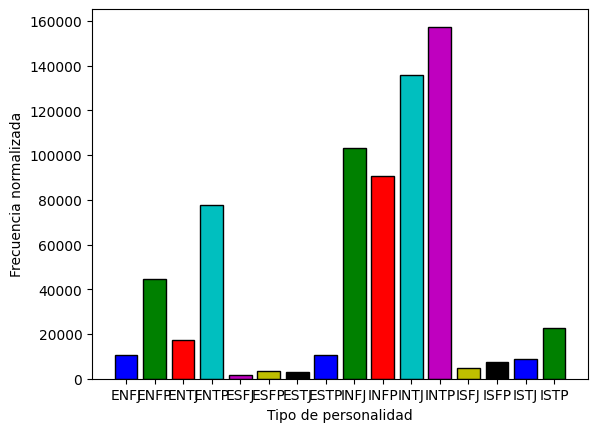

In [24]:
#Crear un gráfico de barras con barras separadas y de diferentes colores
plt.bar(resultados_df['Tipo'], resultados_df['Frecuencia normalizada'], color=['b', 'g', 'r', 'c', 'm', 'y', 'k'], edgecolor='black')
plt.xlabel('Tipo de personalidad')
plt.ylabel('Frecuencia normalizada')
plt.show()

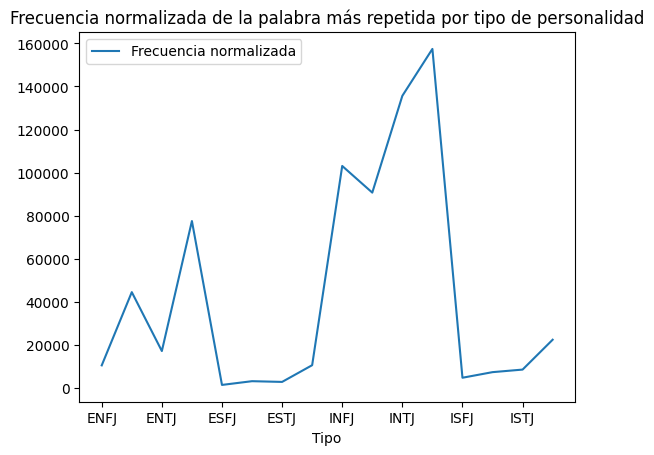

In [25]:
ax = resultados_df.plot.line(x='Tipo', y='Frecuencia normalizada')
ax.set_title('Frecuencia normalizada de la palabra más repetida por tipo de personalidad')
plt.show()

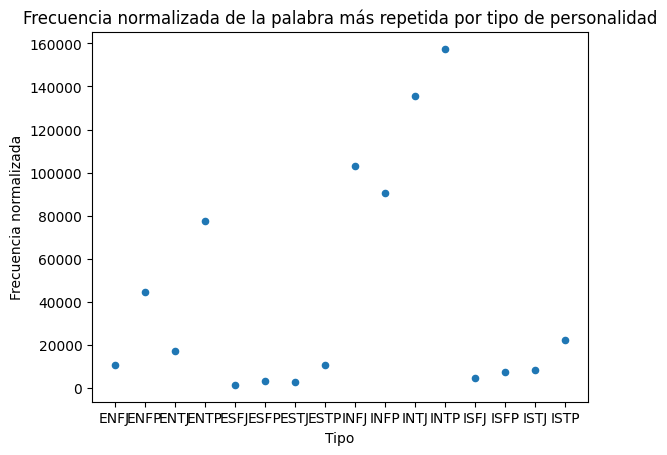

In [26]:
ax = resultados_df.plot.scatter(x='Tipo', y='Frecuencia normalizada')
ax.set_title('Frecuencia normalizada de la palabra más repetida por tipo de personalidad')
plt.show()


In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

print("Nube de palabras según la personalidad")
print()
print()

for index, row in mbti.iterrows():
  words = {}
  for palabra in palabras:
    words[palabra] = row[palabra]
  wordcloud = WordCloud(width = 600, height = 600,
                background_color ='white',
                min_font_size = 10).generate_from_frequencies(words)
  plt.figure(figsize = (6, 6), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)
  plt.title(label='           ' + row['personality'] + '           ',
          fontsize=40,
          backgroundcolor='gray',
          color="white",
          fontstyle="italic",
          pad="40.0",
          weight='bold')
  plt.show()
  print()
  print()


Output hidden; open in https://colab.research.google.com to view.

### Comentarios: 3. Visualización por Nube de Palabras
Usando las frecuencias de las palabras en cada tipo de personalidad realizamos una nube de palabras usando la biblioteca wordcloud de python. Cuanta más frecuencia, más grande es la palabra. Usamos el método de la biblioteca que toma un diccionario de frecuencias por palabra.

Variables para realizar el análisis de componentes principles (n = 2, o sea dos componentes):
['actually' 'also' 'always' 'come' 'could' 'de' 'det' 'en' 'enfj' 'enfp'
 'entj' 'entp' 'er' 'esfj' 'esfp' 'estj' 'estp' 'even' 'fe' 'feel' 'fi'
 'find' 'friend' 'function' 'german' 'germany' 'get' 'give' 'go' 'good'
 'help' 'ikke' 'infj' 'infp' 'interest' 'intj' 'intp' 'isfj' 'isfp' 'istj'
 'istp' 'jeg' 'know' 'life' 'like' 'lol' 'look' 'lot' 'love' 'make' 'mean'
 'much' 'need' 'og' 'one' 'people' 'person' 'pretty' 'really' 'right'
 'say' 'se' 'see' 'seem' 'si' 'someone' 'something' 'still' 'take' 'talk'
 'thank' 'thing' 'think' 'though' 'til' 'time' 'try' 'type' 'u' 'use'
 'want' 'way' 'well' 'work' 'would' 'yeah' 'year']

Coeficientes de las dos componentes
Componente 1:
[-6.93650173e-04  1.14348275e-01  5.17677447e-03  7.95046948e-02
  6.46136502e-02 -2.57479139e-04 -5.78667860e-04  4.06828885e-03
 -1.01778439e-03 -8.27654332e-05 -1.70962375e-03  7.14584460e-03
 -5.76357149e-04 -2.44547256

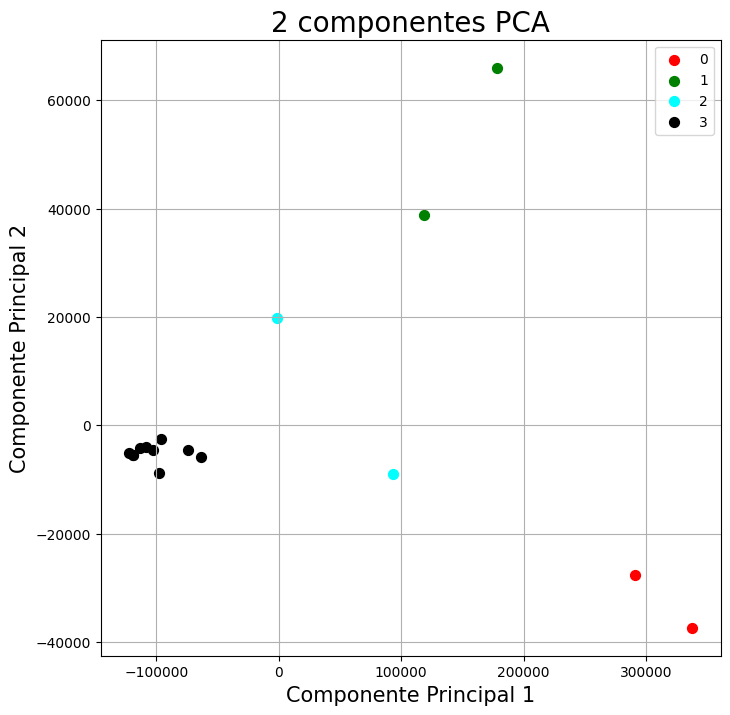

In [45]:
# Agrupamiento por KMEANS
mbti_orig = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MBTI500.data.enriched.txt', sep='\t')
mbti = mbti_orig.drop(columns=['personality', 'count'])

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np

pca = PCA(n_components = 2)

X_train = pca.fit_transform(mbti)

print("Variables para realizar el análisis de componentes principles (n = 2, o sea dos componentes):")
print(pca.feature_names_in_)
print()

print("Coeficientes de las dos componentes")
print("Componente 1:")
print(pca.components_[0])
print("Componente 2:")
print(pca.components_[1])
print()

print("Varianza explicada de cada componente:")
print(pca.explained_variance_ratio_)
print()

pca1 = np.abs(pca.components_[0])
pca1sum = np.sum(pca1)
pca1p = pca1/pca1sum

pca1p_inds = pca1p.argsort()
sorted_pca1p = pca1p[pca1p_inds[::-1]]
sorted_pca1p_label = pca.feature_names_in_[pca1p_inds[::-1]]
comb_pca1p = np.dstack((sorted_pca1p_label, sorted_pca1p))

print("Porcentaje de la influencia de cada variable en la componente 1:")
print(np.array([[f"{i} {j:.2%}"] for i, j in comb_pca1p[0]]))
print()

pca2 = np.abs(pca.components_[1])
pca2sum = np.sum(pca2)
pca2p = pca2/pca2sum

pca2p_inds = pca2p.argsort()
sorted_pca2p = pca2p[pca2p_inds[::-1]]
sorted_pca2p_label = pca.feature_names_in_[pca2p_inds[::-1]]
comb_pca2p = np.dstack((sorted_pca2p_label, sorted_pca2p))

print("Porcentaje de la influencia de cada variable en la componente 2:")
print(np.array([[f"{i} {j:.2%}"] for i, j in comb_pca2p[0]]))
print()


pca2 = np.abs(pca.components_[1])
pca2sum = np.sum(pca2)

km = KMeans(
    n_clusters=4, init='random',
    n_init=12, max_iter=300,
    tol=1e-04, random_state=0
)

y_km = km.fit_predict(mbti)

principalDf = pd.DataFrame(data = X_train
             , columns = ['Componente Principal 1', 'Componente Principal 2'])
principalDf.insert(loc=0, column='Personalidad', value=mbti_orig['personality'])

print(principalDf)
print()

print("Agrupamiento en 4 clases usando KMeans")
comb_km = np.dstack((mbti_orig['personality'], y_km))
print(comb_km)
print()

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Componente Principal 1', fontsize = 15)
ax.set_ylabel('Componente Principal 2', fontsize = 15)
ax.set_title('2 componentes PCA', fontsize = 20)

targets = [0, 1, 2, 3]
colors = ['red', 'green', 'cyan', 'black']

mbti = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MBTI500.data.enriched.txt', sep='\t')
for target, color in zip(targets,colors):
    indicesToKeep = y_km == target
    ax.scatter(principalDf.loc[indicesToKeep, 'Componente Principal 1']
               , principalDf.loc[indicesToKeep, 'Componente Principal 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


for i in range(4):
  print('Grupo ' + str(i))
  for j in range(16):
    if (i == y_km[j]):
      print(mbti['personality'][j])
  print()


### Comentarios: 4. Agrupamiento por KMeans y PCA para visualizar las personalidades en 2 dimensiones
* Realizamos un agrupamiento de las 16 personalidades en 4 grupos por cercanía en el espacio multidimensinal de las frecuencias de las palabras normalizadas.
* Para visualizar los puntos realizamos un análisis en componentes principales de dos dimensiones.
* Se muestra la varianza explicada de cada componente en donde vemos que ya con una primer componente se puede explicar toda la varibilidad.
* Después vemos el porcentaje de influencia de cada palabra en cada componente ordenadas de mayor a menor.
* Vemos que se genera un grupo grande con 10 tipos de personalidad, y 3 grupos pequeños de dos tipos de personalidad.
* Se grafican los grupos usando las dos componentes principales.

### Conclusión
---

> Luego de este análisis, podemos concluir que las siguientes palabras influyen en mayor medida en el test de personalidades:
* like 5.43%
* think 4.75%
* people 4.47%
* get 4.21%
* thing 3.30%

> Vemos en la nube de palabras como las mismas palabras se corresponden.

> Vemos en el gráfico final que está la mayor cantidad de tipos de personalidades según las similitudes de las frecuencias de palabras en el grupo 4 del agrupamiento.


In [60]:
mbti = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MBTI500.data.enriched.txt', sep='\t')

# eliminando columnas cuyo nombre es menor a 3

mbti = mbti.drop([columna for columna in mbti.columns if len(columna) < 3], axis=1)

In [61]:
mbti.shape

(16, 79)

→ Se eliminaron 10 columnas

### → Vamos a ver qué palabras hay en el dataset

In [62]:
mbti.columns

Index(['personality', 'count', 'actually', 'also', 'always', 'come', 'could',
       'det', 'enfj', 'enfp', 'entj', 'entp', 'esfj', 'esfp', 'estj', 'estp',
       'even', 'feel', 'find', 'friend', 'function', 'german', 'germany',
       'get', 'give', 'good', 'help', 'ikke', 'infj', 'infp', 'interest',
       'intj', 'intp', 'isfj', 'isfp', 'istj', 'istp', 'jeg', 'know', 'life',
       'like', 'lol', 'look', 'lot', 'love', 'make', 'mean', 'much', 'need',
       'one', 'people', 'person', 'pretty', 'really', 'right', 'say', 'see',
       'seem', 'someone', 'something', 'still', 'take', 'talk', 'thank',
       'thing', 'think', 'though', 'til', 'time', 'try', 'type', 'use', 'want',
       'way', 'well', 'work', 'would', 'yeah', 'year'],
      dtype='object')

Como podemos observar dentro de las palabras están las abreviaciones de personalidades, las eliminamos ya que no nos proporcionarán información relevante.

In [63]:
abv = ['enfj', 'enfp', 'entj', 'entp', 'esfj', 'esfp', 'estj', 'estp', 'infj', 'infp', 'intj', 'intp', 'isfj', 'isfp', 'istj', 'istp',]

mbti = mbti.drop([column for column in  mbti.columns if column in abv], axis=1)

##### Normalizar palabras

In [64]:
# Tomamos el data set desde la columna 3 ya que las dos primeras son el tipo de personalidad y el count
palabras = mbti.iloc[:,2:].columns.tolist()

for palabra in palabras:
    print(palabra)
    mbti[palabra] = mbti[palabra] / mbti['count']

mbti

actually
also
always
come
could
det
even
feel
find
friend
function
german
germany
get
give
good
help
ikke
interest
jeg
know
life
like
lol
look
lot
love
make
mean
much
need
one
people
person
pretty
really
right
say
see
seem
someone
something
still
take
talk
thank
thing
think
though
til
time
try
type
use
want
way
well
work
would
yeah
year


,personality,count,actually,also,always,come,could,det,even,feel,...,try,type,use,want,way,well,work,would,yeah,year
0,ENFJ,1534,0.000000,2.240548,0.000000,1.570404,0.000000,0.000000,1.769231,4.864407,...,2.188396,2.908735,1.578227,2.838331,2.544329,1.904172,1.840939,3.410039,0.000000,0.000000
1,ENFP,6167,0.000000,2.222150,1.662072,1.655262,0.000000,0.000000,1.871088,4.717529,...,2.219069,1.979731,0.000000,3.143668,2.583914,1.807848,2.202043,2.716556,0.000000,0.000000
2,ENTJ,2955,0.000000,2.140440,0.000000,1.452453,0.000000,0.000000,1.746193,2.749915,...,1.952284,2.399662,1.688663,2.765482,2.310660,1.865990,2.349239,3.295770,0.000000,0.000000
3,ENTP,11725,0.000000,2.069765,0.000000,1.434968,1.478380,0.000000,1.893049,2.818081,...,1.979872,2.139957,1.859616,2.573305,2.483923,1.915394,2.160682,3.215949,0.000000,0.000000
4,ESFJ,181,0.000000,2.486188,1.834254,1.734807,0.000000,0.000000,1.839779,3.834254,...,1.734807,4.922652,1.850829,2.801105,2.696133,2.104972,0.000000,3.458564,0.000000,0.000000
5,ESFP,360,0.000000,2.150000,0.000000,1.625000,0.000000,0.000000,0.000000,3.161111,...,1.675000,4.050000,1.800000,2.250000,2.380556,1.922222,1.533333,3.547222,1.727778,0.000000
6,ESTJ,482,0.000000,1.921162,0.000000,0.000000,0.000000,3.636929,1.495851,2.209544,...,1.502075,3.863071,1.674274,2.172199,2.031120,1.473029,1.717842,3.172199,0.000000,0.000000
7,ESTP,1986,1.283988,2.410373,0.000000,0.000000,1.391742,0.000000,1.974320,1.422961,...,1.360524,1.594663,1.902316,2.114300,1.825780,1.892749,1.517623,3.536757,0.000000,1.301611
8,INFJ,14963,0.000000,2.254027,0.000000,1.622001,0.000000,0.000000,2.016908,4.865669,...,2.290316,1.987636,1.587115,2.984696,2.726726,1.849495,2.178106,2.952951,0.000000,0.000000
9,INFP,12134,0.000000,2.201994,1.649662,1.555546,0.000000,0.000000,2.039146,4.937943,...,2.097824,2.020933,1.503791,2.871106,2.539064,1.869705,1.913219,2.961678,0.000000,0.000000


## Frecuencias de las palabras más repetidas
Según lo investigado sobre los tipos de personalidad los podemos dividir en 4 subgrupos:

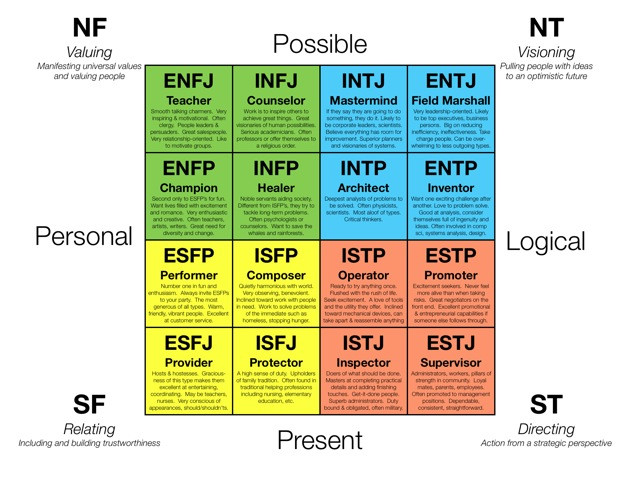

1. NF (manifestar valores universales y valorar a las personas)
    - ENFJ
    - ENFP
    - INFJ
    - INFP
2. NT (empujando a las personas con ideas hacia un futuro optimista)
    - ENTJ
    - ENTP
    - INTJ
    - INTP
3. SF (incluyendo y construyendo confianza)
    - ESFJ
    - ESFP
    - ISFJ
    - ISFP
4. ST (acción desde una perspectiva estratégica)
    - ESTJ
    - ESTP
    - ISTJ
    - ISTP

In [65]:
# Subgrupos
group_mapping = {
    'NF':'NF',
    'NT':'NT',
    'SF':'SF',
    'ST':'ST'
}

# Creo una nueva columna con el grupo al que pertenece cada uno
mbti['grupo'] = mbti['personality'].apply(lambda x: next((group for pattern, group in group_mapping.items() if pattern in x), None))

mbti

,personality,count,actually,also,always,come,could,det,even,feel,...,type,use,want,way,well,work,would,yeah,year,grupo
0,ENFJ,1534,0.000000,2.240548,0.000000,1.570404,0.000000,0.000000,1.769231,4.864407,...,2.908735,1.578227,2.838331,2.544329,1.904172,1.840939,3.410039,0.000000,0.000000,NF
1,ENFP,6167,0.000000,2.222150,1.662072,1.655262,0.000000,0.000000,1.871088,4.717529,...,1.979731,0.000000,3.143668,2.583914,1.807848,2.202043,2.716556,0.000000,0.000000,NF
2,ENTJ,2955,0.000000,2.140440,0.000000,1.452453,0.000000,0.000000,1.746193,2.749915,...,2.399662,1.688663,2.765482,2.310660,1.865990,2.349239,3.295770,0.000000,0.000000,NT
3,ENTP,11725,0.000000,2.069765,0.000000,1.434968,1.478380,0.000000,1.893049,2.818081,...,2.139957,1.859616,2.573305,2.483923,1.915394,2.160682,3.215949,0.000000,0.000000,NT
4,ESFJ,181,0.000000,2.486188,1.834254,1.734807,0.000000,0.000000,1.839779,3.834254,...,4.922652,1.850829,2.801105,2.696133,2.104972,0.000000,3.458564,0.000000,0.000000,SF
5,ESFP,360,0.000000,2.150000,0.000000,1.625000,0.000000,0.000000,0.000000,3.161111,...,4.050000,1.800000,2.250000,2.380556,1.922222,1.533333,3.547222,1.727778,0.000000,SF
6,ESTJ,482,0.000000,1.921162,0.000000,0.000000,0.000000,3.636929,1.495851,2.209544,...,3.863071,1.674274,2.172199,2.031120,1.473029,1.717842,3.172199,0.000000,0.000000,ST
7,ESTP,1986,1.283988,2.410373,0.000000,0.000000,1.391742,0.000000,1.974320,1.422961,...,1.594663,1.902316,2.114300,1.825780,1.892749,1.517623,3.536757,0.000000,1.301611,ST
8,INFJ,14963,0.000000,2.254027,0.000000,1.622001,0.000000,0.000000,2.016908,4.865669,...,1.987636,1.587115,2.984696,2.726726,1.849495,2.178106,2.952951,0.000000,0.000000,NF
9,INFP,12134,0.000000,2.201994,1.649662,1.555546,0.000000,0.000000,2.039146,4.937943,...,2.020933,1.503791,2.871106,2.539064,1.869705,1.913219,2.961678,0.000000,0.000000,NF


In [70]:
# Groupby para ver qué subgrupo repitió más cada palabra.

group_mbti = mbti.groupby('grupo').sum()
#group_mbti = group_mbti.drop(['personality', 'count'], axis=1)

group_mbti.style.highlight_max(color='cadetblue')

<ipython-input-70-8cf10c29d38e>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_mbti = mbti.groupby('grupo').sum()


,count,actually,also,always,come,could,det,even,feel,find,friend,function,german,germany,get,give,good,help,ikke,interest,jeg,know,life,like,lol,look,lot,love,make,mean,much,need,one,people,person,pretty,really,right,say,see,seem,someone,something,still,take,talk,thank,thing,think,though,til,time,try,type,use,want,way,well,work,would,yeah,year
grupo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
NF,34798,0.000000,8.918719,3.311734,6.403213,0.000000,0.000000,7.696373,19.385547,8.443070,9.295975,1.640156,0.000000,0.000000,20.493291,0.000000,13.387543,1.641716,0.000000,0.000000,0.000000,15.992384,5.669350,28.484934,0.000000,1.516400,7.889305,9.622043,16.007790,3.129304,9.276904,7.660019,13.976214,21.848989,4.813973,0.000000,14.208692,0.000000,13.424239,9.540571,0.000000,7.358890,8.691629,0.000000,8.213592,3.308560,0.000000,16.043356,23.615007,1.542855,0.000000,13.816451,8.795606,8.897035,4.669133,11.837801,10.394033,7.431221,8.134307,12.041224,0.000000,0.000000
NT,62068,0.000000,8.548160,0.000000,5.820268,4.433413,0.000000,7.567911,11.390341,7.589958,6.299350,0.000000,0.000000,0.000000,19.992465,2.840276,12.877423,0.000000,0.000000,1.399984,0.000000,13.488783,4.626203,24.795999,0.000000,5.852360,6.579949,1.346531,15.201648,6.274471,8.161924,7.171717,13.942945,20.557705,0.000000,0.000000,10.963890,0.000000,12.961190,8.791415,0.000000,5.881175,8.183871,0.000000,7.936407,1.413134,0.000000,14.551596,21.683870,1.394115,0.000000,12.613801,8.009780,8.014891,7.138679,10.544035,9.719066,7.351697,9.082124,13.012384,0.000000,0.000000
SF,2066,0.000000,9.106913,5.090913,4.895807,0.000000,0.000000,5.614372,14.934794,5.457943,8.878687,7.254182,0.000000,0.000000,20.039402,0.000000,12.126501,0.000000,0.000000,0.000000,0.000000,16.443305,0.000000,33.169265,1.740331,3.349778,8.799614,6.317765,15.403446,3.481444,9.342277,1.661538,14.335492,21.370379,0.000000,1.566667,14.135139,0.000000,15.471597,9.703805,1.675000,1.683077,8.275054,0.000000,7.850100,3.494807,1.823204,15.864998,27.063399,5.374955,0.000000,12.766807,7.512356,16.008300,7.150565,10.176819,10.037304,8.032030,5.042081,13.915720,1.727778,0.000000
ST,7135,1.283988,8.500969,1.407884,3.040185,2.992708,3.636929,7.228588,9.627289,3.565755,3.729866,1.520747,1.448137,1.448137,19.162658,1.408586,11.060534,0.000000,2.049793,0.000000,1.510373,12.936810,0.000000,24.398855,0.000000,3.009949,6.428614,0.000000,13.364725,4.619575,7.661661,3.665147,12.743317,18.344409,0.000000,0.000000,11.003406,1.506546,12.955387,8.853763,0.000000,3.045647,7.238482,1.322759,7.271370,3.400391,0.000000,12.348177,20.497775,3.102182,1.487552,11.408810,7.020248,10.189547,7.189484,9.803512,8.612263,7.054852,8.189058,13.678572,0.000000,1.301611


La palabra más repetida es "like", como no nos resulta muy útil vamos a eliminarla

In [71]:
group_mbti = group_mbti.drop('like', axis=1)

In [73]:
group_mbti.style.highlight_max(color='cadetblue')

,count,actually,also,always,come,could,det,even,feel,find,friend,function,german,germany,get,give,good,help,ikke,interest,jeg,know,life,lol,look,lot,love,make,mean,much,need,one,people,person,pretty,really,right,say,see,seem,someone,something,still,take,talk,thank,thing,think,though,til,time,try,type,use,want,way,well,work,would,yeah,year
grupo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
NF,34798,0.000000,8.918719,3.311734,6.403213,0.000000,0.000000,7.696373,19.385547,8.443070,9.295975,1.640156,0.000000,0.000000,20.493291,0.000000,13.387543,1.641716,0.000000,0.000000,0.000000,15.992384,5.669350,0.000000,1.516400,7.889305,9.622043,16.007790,3.129304,9.276904,7.660019,13.976214,21.848989,4.813973,0.000000,14.208692,0.000000,13.424239,9.540571,0.000000,7.358890,8.691629,0.000000,8.213592,3.308560,0.000000,16.043356,23.615007,1.542855,0.000000,13.816451,8.795606,8.897035,4.669133,11.837801,10.394033,7.431221,8.134307,12.041224,0.000000,0.000000
NT,62068,0.000000,8.548160,0.000000,5.820268,4.433413,0.000000,7.567911,11.390341,7.589958,6.299350,0.000000,0.000000,0.000000,19.992465,2.840276,12.877423,0.000000,0.000000,1.399984,0.000000,13.488783,4.626203,0.000000,5.852360,6.579949,1.346531,15.201648,6.274471,8.161924,7.171717,13.942945,20.557705,0.000000,0.000000,10.963890,0.000000,12.961190,8.791415,0.000000,5.881175,8.183871,0.000000,7.936407,1.413134,0.000000,14.551596,21.683870,1.394115,0.000000,12.613801,8.009780,8.014891,7.138679,10.544035,9.719066,7.351697,9.082124,13.012384,0.000000,0.000000
SF,2066,0.000000,9.106913,5.090913,4.895807,0.000000,0.000000,5.614372,14.934794,5.457943,8.878687,7.254182,0.000000,0.000000,20.039402,0.000000,12.126501,0.000000,0.000000,0.000000,0.000000,16.443305,0.000000,1.740331,3.349778,8.799614,6.317765,15.403446,3.481444,9.342277,1.661538,14.335492,21.370379,0.000000,1.566667,14.135139,0.000000,15.471597,9.703805,1.675000,1.683077,8.275054,0.000000,7.850100,3.494807,1.823204,15.864998,27.063399,5.374955,0.000000,12.766807,7.512356,16.008300,7.150565,10.176819,10.037304,8.032030,5.042081,13.915720,1.727778,0.000000
ST,7135,1.283988,8.500969,1.407884,3.040185,2.992708,3.636929,7.228588,9.627289,3.565755,3.729866,1.520747,1.448137,1.448137,19.162658,1.408586,11.060534,0.000000,2.049793,0.000000,1.510373,12.936810,0.000000,0.000000,3.009949,6.428614,0.000000,13.364725,4.619575,7.661661,3.665147,12.743317,18.344409,0.000000,0.000000,11.003406,1.506546,12.955387,8.853763,0.000000,3.045647,7.238482,1.322759,7.271370,3.400391,0.000000,12.348177,20.497775,3.102182,1.487552,11.408810,7.020248,10.189547,7.189484,9.803512,8.612263,7.054852,8.189058,13.678572,0.000000,1.301611


### Frecuencia de las 5 palabras más repetidas por cada tipo de personalidad

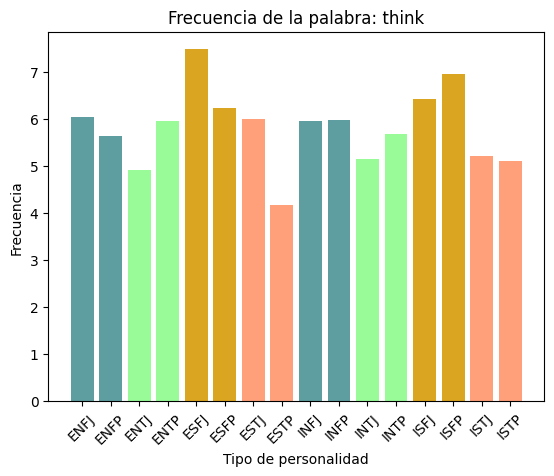

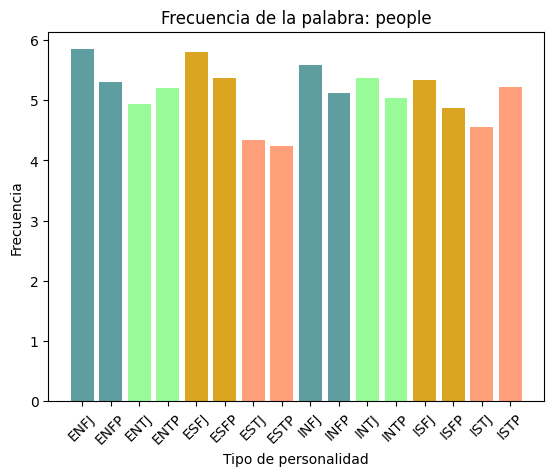

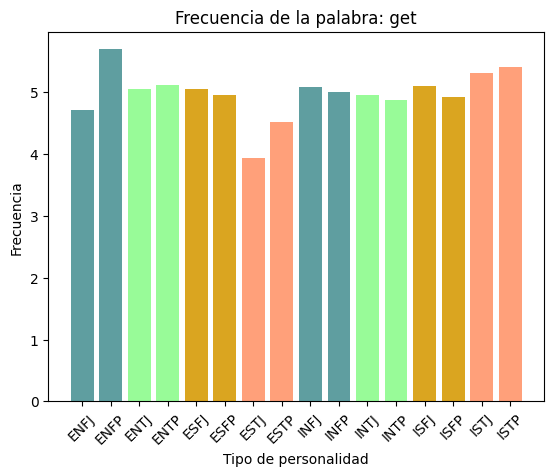

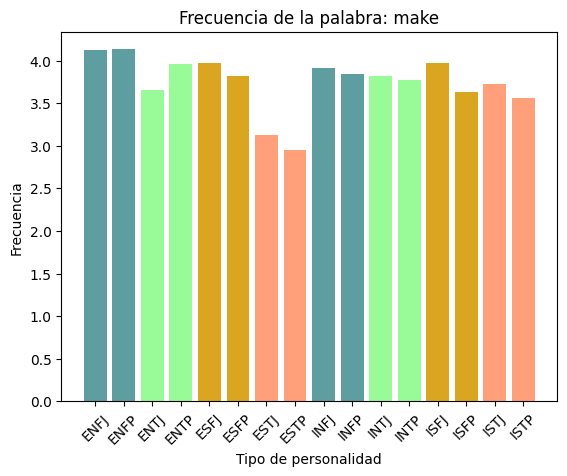

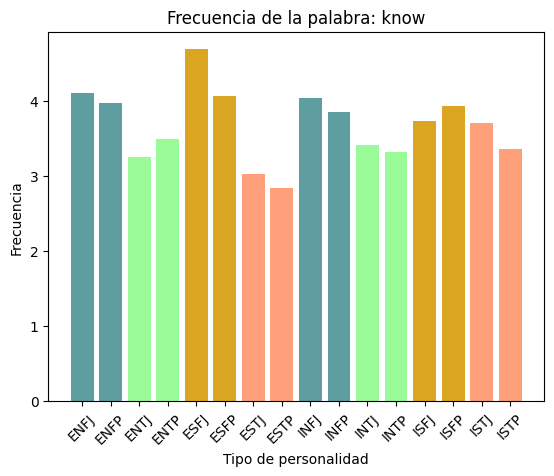

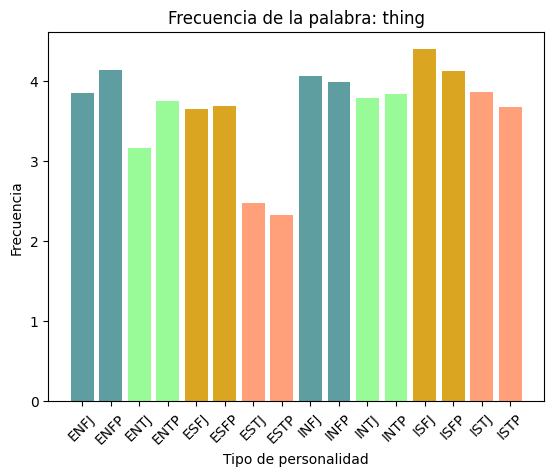

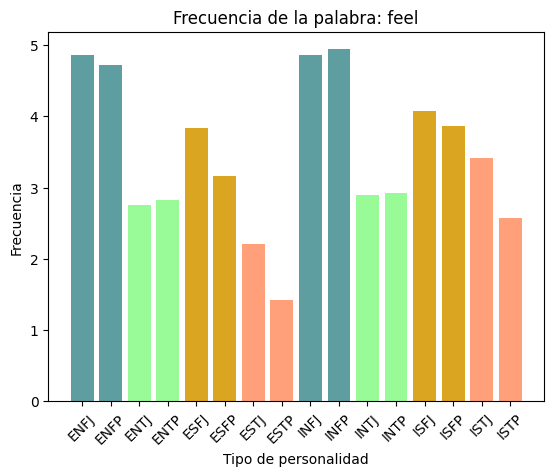

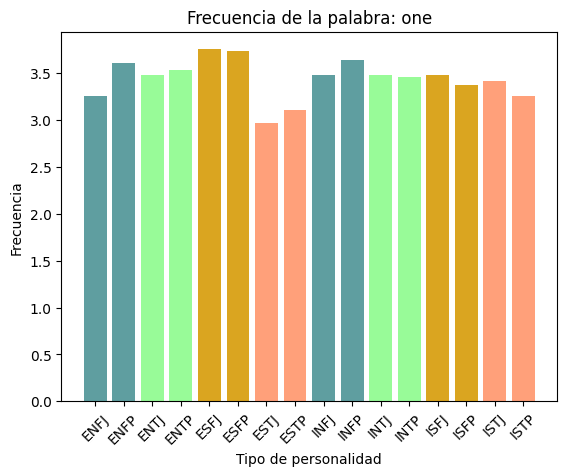

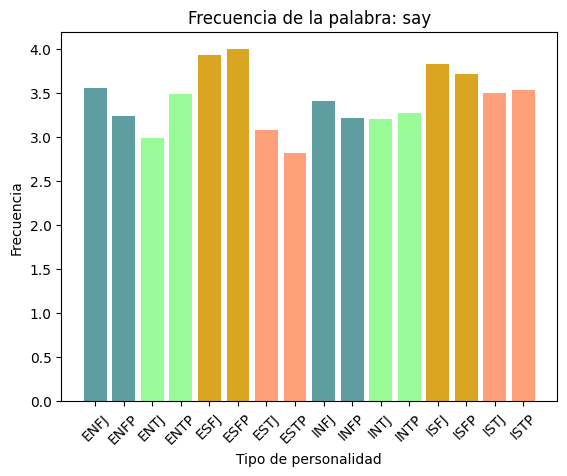

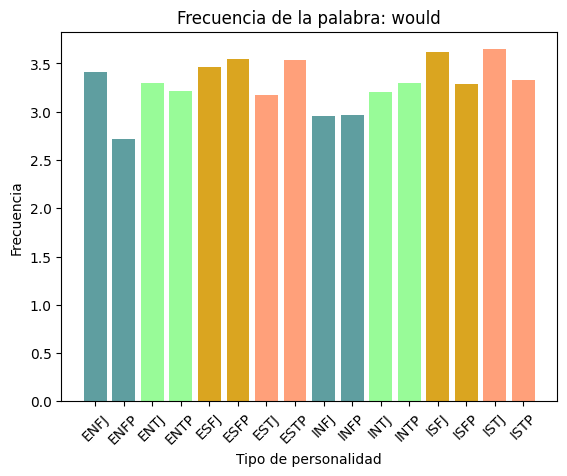

In [74]:
# Obtenemos la suma de las repeticiones de cada palabra
frecuencia = group_mbti.iloc[:,1:].sum()

# Seleccionamos las 5 más repetidas
top_10 = frecuencia.nlargest(10)

# Vamos a colorear las barras dependiendo el subgrupo en el que se encuentren
color_mapping = {
    'NT' : 'palegreen',
    'NF' : 'cadetblue',
    'SF' : 'goldenrod',
    'ST' : 'lightsalmon'
}

for word in top_10.index:
    frecuencias = mbti[word].tolist()

    # Graficamos la frecuecia de las 5 palabras para cada grupo
    plt.bar(mbti['personality'], frecuencias,  color=[color_mapping[group] for group in mbti['grupo']])
    plt.xlabel('Tipo de personalidad')
    plt.ylabel('Frecuencia')
    plt.title(f'Frecuencia de la palabra: {word}')
    plt.xticks(rotation=45)

    plt.show()


En la frecuencia de palabra "feel" se observa una mayor diferencia entre los subgrupos, siendo el que más repeticiones tiene el grupo NT.

#### Las 5 palabras más repetidas por cada subgrupo

In [75]:
mbti_subgrupos = mbti.drop(['get', 'like', 'count'], axis=1)


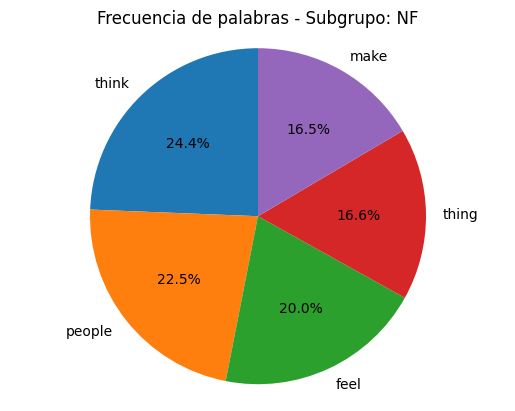

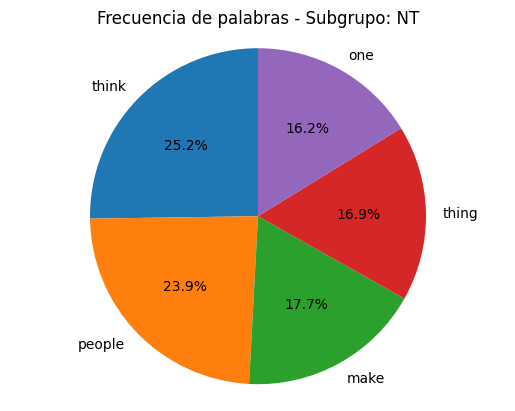

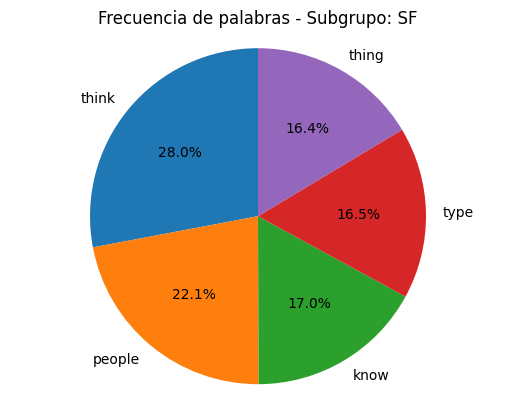

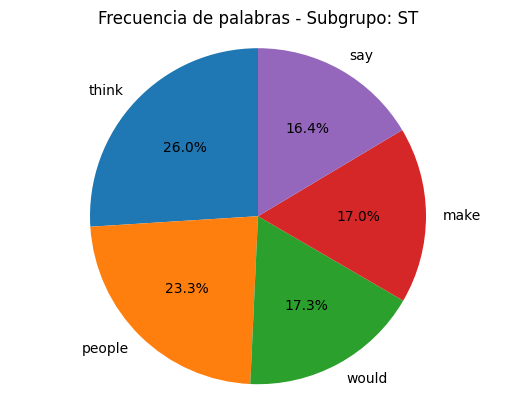

In [76]:
subgrupos = mbti_subgrupos['grupo'].unique()

for subgrupo in subgrupos:
    df_subgrupo = mbti_subgrupos[mbti_subgrupos['grupo'] == subgrupo]

    top_palabras =  df_subgrupo.iloc[:,1:-1].sum().sort_values(ascending=False).head(5).index

    frecuencias = df_subgrupo[top_palabras].sum()

    plt.pie(frecuencias, labels=top_palabras, autopct='%1.1f%%', startangle=90)
    plt.title(f"Frecuencia de palabras - Subgrupo: {subgrupo}")
    plt.axis('equal')
    plt.show()

### Conclusión

---

Podemos observar que en los cuatro casos las dos primeras palabras más repetidas coinciden: think y people

En los grupos NF y NT podemos podemos ver que tambien coinciden con la palabra thing y make. En el grupo NF aparece además la palabra feel.

> El subgrupo NF (que incluye intuición y sentimiento)
>
> Están enfocados principalmente en percibir patrones e interrelaciones;
>
> Basando conclusiones en valores personales o sociales con un enfoque en la comprensión y la armonía.
>
> Valorando a las personas

Según estas descripciones resulta razonable que entre las palabras más repetidas encontremos "personas", "sentir"

En los siguientes dos subgrupos SF y ST aparece la palabra say, make, thing y know
Recordando lo que connota Sentir (S):
>  Están orientados principalmente hacia lo que se puede percibir por los cinco sentidos.
